## PYTHON JOURNEY MACHINE & DEEP LEARNING
### Trabalho prático usando Python
 

### Criar série temporal, modelo Alisamento exponencial Holt-Winters

#### links:
Pandas To Datetime - String to Date - pd.to_datetime() - Data Independent
Python strptime() - string to datetime object (programiz.com)
How to Work With Dates in Python. Parsing, formatting, time zones, and… | by David Mezzetti | Better Programming | Medium
https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html

In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
from statsmodels.tsa.api import ExponentialSmoothing

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv(r'Faturamento_v2.csv', ";")


In [3]:
df.head()

,Ano_Mes,Faturamento
0,2011-01,43484
1,2011-02,45859
2,2011-03,56254
3,2011-04,58224
4,2011-05,75403


In [4]:
df['Ano_Mes'] = pd.to_datetime(df['Ano_Mes'], format='%Y-%m-%d')
df.head()

,Ano_Mes,Faturamento
0,2011-01-01,43484
1,2011-02-01,45859
2,2011-03-01,56254
3,2011-04-01,58224
4,2011-05-01,75403


In [5]:
df.dtypes

Ano_Mes        datetime64[ns]
Faturamento             int64
dtype: object

In [6]:
df.index

RangeIndex(start=0, stop=36, step=1)

In [7]:
print (df.dtypes)

Ano_Mes        datetime64[ns]
Faturamento             int64
dtype: object


In [8]:
df.set_index("Ano_Mes", inplace=True)

<AxesSubplot:title={'center':'Faturamento'}, xlabel='Ano_Mes'>

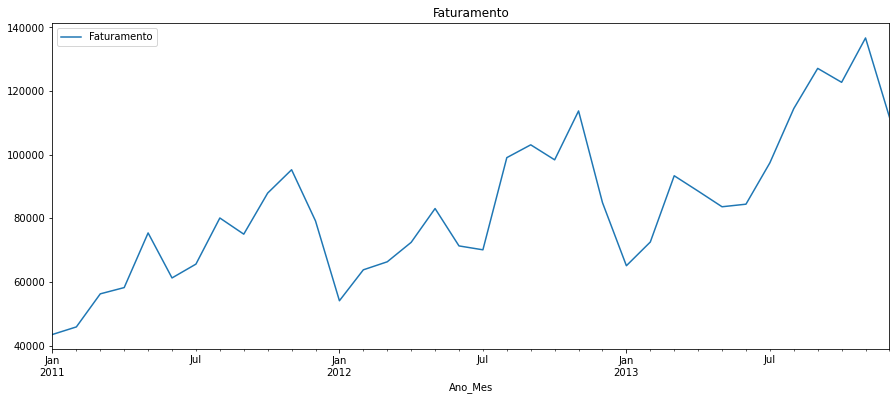

In [9]:
# Gráfico da série temporal
df[['Faturamento']].plot(title='Faturamento')


In [10]:
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   


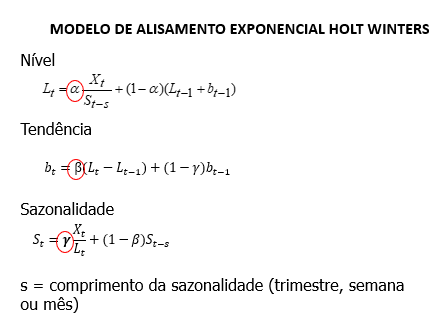

In [11]:
print(df.shape)

(36, 1)


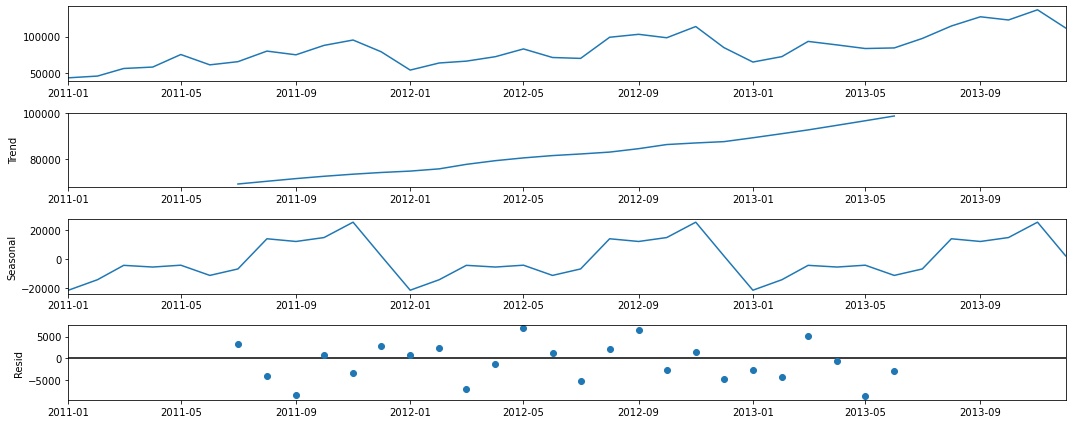

In [12]:
result = seasonal_decompose(df, model='additive')
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)
result.plot()
plt.show()

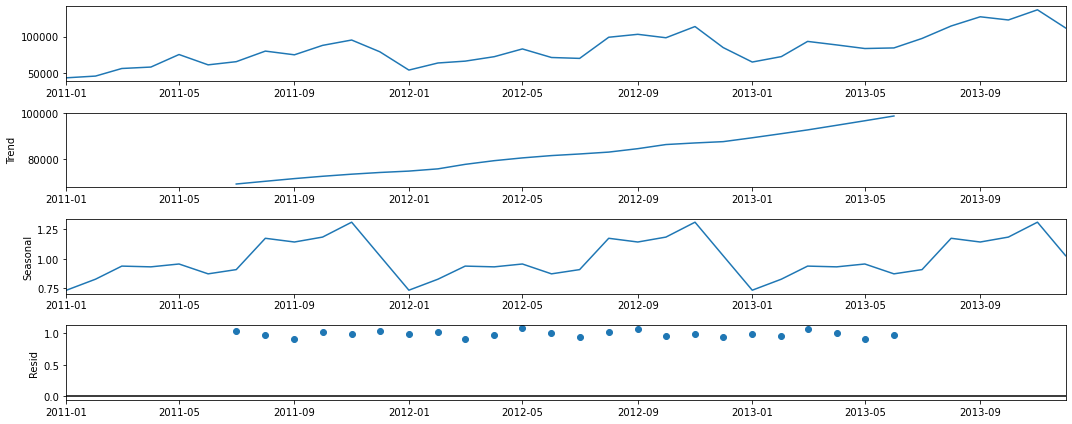

In [16]:
result = seasonal_decompose(df, model='multiplicative')
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)
result.plot()
plt.show()

In [17]:
fit1 = ExponentialSmoothing(
    df,
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [18]:
fit2 = ExponentialSmoothing(
    df,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [19]:
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]


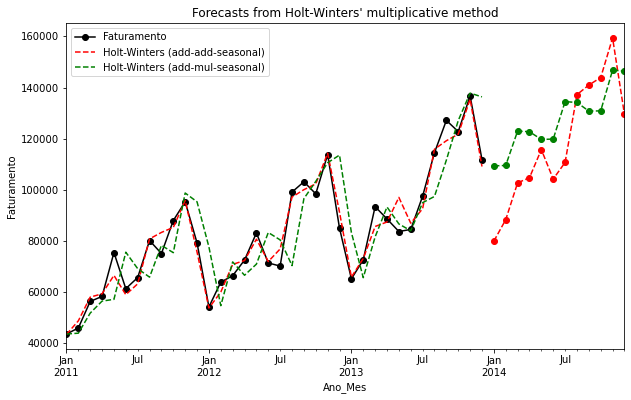

Figure 7.6: Forecasting Faturamento using Holt-Winters method with both additive and multiplicative seasonality.


,Additive,Multiplicative
$\alpha$,1.490130e-08,9.913736e-01
$\beta$,2.221019e-09,5.224083e-10
$\phi$,NaN,NaN
$\gamma$,2.242132e-12,1.133310e-13
$l_0$,5.696178e+01,5.303692e+01
$b_0$,2.535251e-01,4.072832e-01
SSE,6.918961e+08,5.760647e+09


In [20]:
ax = df.plot(
    figsize=(10, 6),
    marker="o",
    color="black",
    title="Forecasts from Holt-Winters' multiplicative method",
)
ax.set_ylabel("Faturamento")
ax.set_xlabel("Mês/Ano")
fit1.fittedvalues.plot(ax=ax, style="--", color="red")
fit2.fittedvalues.plot(ax=ax, style="--", color="green")

fit1.forecast(12).rename("Holt-Winters (add-add-seasonal)").plot(
    ax=ax, style="--", marker="o", color="red", legend=True
)
fit2.forecast(12).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)

plt.show()
print(
    "Figure 7.6: Forecasting Faturamento using Holt-Winters method with both additive and multiplicative seasonality."
)

results